In [174]:
# import statements.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [175]:
# load data
df = pd.read_csv("./dataset/loan.csv", index_col=False)

/usr/local/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [176]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [177]:
df.shape

(39717, 111)

# Data Cleaning and Standardization

In [178]:
# Seems a lot of NaN values. We will be dropping them subsequently. 
# Fixing data.
# Empty
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [179]:
# let's start with NA values.
df.dropna(axis=1, inplace=True, how="all")

In [180]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [181]:
# Almost 50% of columns were NaN
df.shape

(39717, 57)

In [182]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [183]:
# let's select the one which will help in analysis.
column_list=['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc']
df = df[column_list]

In [184]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [185]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [186]:
# drop the loans which are currently running. They are not going to help.
df.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [187]:
df = df[df.loan_status != "Current"]

In [188]:
df.shape

(38577, 21)

In [189]:
# checking if current is really dropped.
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [190]:
# Missing values if any.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [191]:
# Seems emp_length has around 1033 missing values while revol_util has 50. Lets see the data they hold.

In [192]:
# emp_length
df.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [193]:
# We will transform the data for emp_length so that it is integer field.
df.emp_length = df.emp_length.str.rstrip("+ years")
df.emp_length = df.emp_length.str.lstrip("< ")
df.emp_length.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [194]:
df.emp_length.isna().sum() / df.emp_length.shape

array([0.02677761])

In [195]:
# Almost 2.5% of data is empty. 30% of data is 10+ and 25% is 1+. Let us fill the data using mode.
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)

In [196]:
df.emp_length.value_counts()

10    9521
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [197]:
# Convert data to numeric columns.
df.emp_length = df.emp_length.astype('int')

In [198]:
# Now lets drop NA for revol_utils too
df.dropna(subset=['revol_util'], axis=0, inplace=True)

In [199]:
df.revol_util.isna().sum()

0

In [200]:
df.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38527, dtype: object

In [201]:
# Let's convert revol_util to float. 
df.revol_util = df.revol_util.str.rstrip("%")
df.revol_util = df.revol_util.astype("float")
df.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38527, dtype: float64

In [202]:
# int_rate might also have % symbol. Let's convert that too
df.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38527, dtype: object

In [203]:
df.int_rate = df.int_rate.str.rstrip("%")
df.int_rate = df.int_rate.astype("float")
df.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38527, dtype: float64

In [204]:
# Lets check other columns too. 
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [205]:
# Identify candidates for categorical analysis.
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [206]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [207]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [208]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [209]:
df.pub_rec.unique() # This seems to be interesting. Represents number of derogatory public records.

array([0, 1, 2, 3, 4])

In [210]:
df.annual_inc = df.annual_inc.astype("int")

## Outliers

<AxesSubplot:xlabel='annual_inc'>

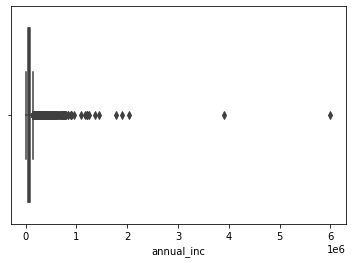

In [211]:
# There is one column called annual income. It might contain the outliers. Need to process them.
# Lets check if it's present or not.
import seaborn as sns

sns.boxplot(x=df['annual_inc'])

In [212]:
# Clearly outliers are present. Let's drop them. We will select value with < 92.5 percentils of the data which is 
# standard in statistics.
percentile_annual_inc = df['annual_inc'].quantile(0.925)
df = df[df.annual_inc <= percentile_annual_inc]
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [213]:
df.shape

(35744, 21)

<AxesSubplot:xlabel='annual_inc'>

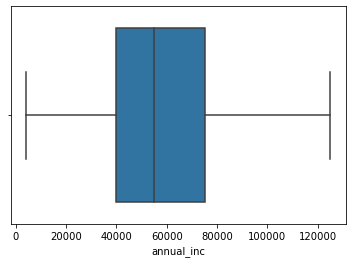

In [214]:
sns.boxplot(x=df['annual_inc'])

<AxesSubplot:xlabel='dti'>

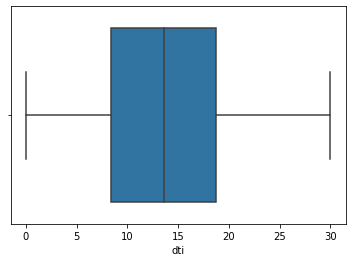

In [215]:
# Let's check the shape of other numeric columns like loan_amount, dti
sns.boxplot(x=df.dti)

<AxesSubplot:xlabel='loan_amnt'>

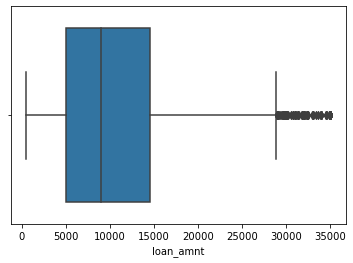

In [216]:
# loan_amount
sns.boxplot(x=df.loan_amnt)

In [217]:
# loan amount has some outliers. Let's filter them out too. 
df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14531.25
0.900    20000.00
0.950    25000.00
0.970    25000.00
0.975    27050.00
0.980    29857.00
0.990    35000.00
1.000    35000.00
Name: loan_amnt, dtype: float64

In [218]:
# filter for 95 Quantile
percentile_loan_amnt = df['loan_amnt'].quantile(0.95)
df = df[df.loan_amnt <= percentile_loan_amnt]
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


<AxesSubplot:xlabel='loan_amnt'>

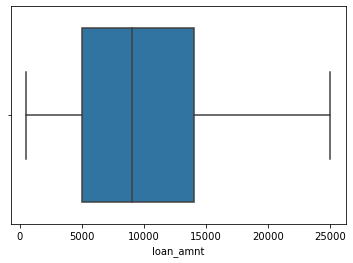

In [219]:
sns.boxplot(x=df.loan_amnt)

# Categorical Data

In [220]:
# We are more interested in reasons leading to loan default. Let's filter those rows out.
df_charged_off = df[df.loan_status=="Charged Off"]

In [221]:
df_charged_off.shape

(5047, 21)

In [222]:
df_charged_off.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
8,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000,...,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,32.6,13
9,5375,5350.0,60 months,12.69,121.45,B,B5,1,RENT,15000,...,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,36.5,3
12,9000,9000.0,36 months,13.49,305.38,C,C1,1,RENT,30000,...,Dec-11,Charged Off,debt_consolidation,10.08,Apr-04,1,4,0,91.7,9
14,10000,10000.0,36 months,10.65,325.74,B,B2,3,RENT,100000,...,Dec-11,Charged Off,other,7.06,May-91,2,14,0,55.5,29


In [223]:
# Lets start with ownership. Idea is to find out the type of ownership where people defaulted.
df_charged_off.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

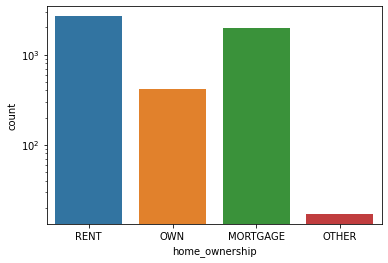

In [225]:
figure, axis = plt.subplots(figsize = (6,4))
axis.set(yscale="log") # log scales generally compress and show a better picture of data variations.
sns.countplot(x='home_ownership', data=df_charged_off)

In [226]:
# Similarly, lets analyse the purpose of loan.
df_charged_off.purpose.unique()

array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'vacation', 'house', 'medical', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

<AxesSubplot:xlabel='purpose', ylabel='count'>

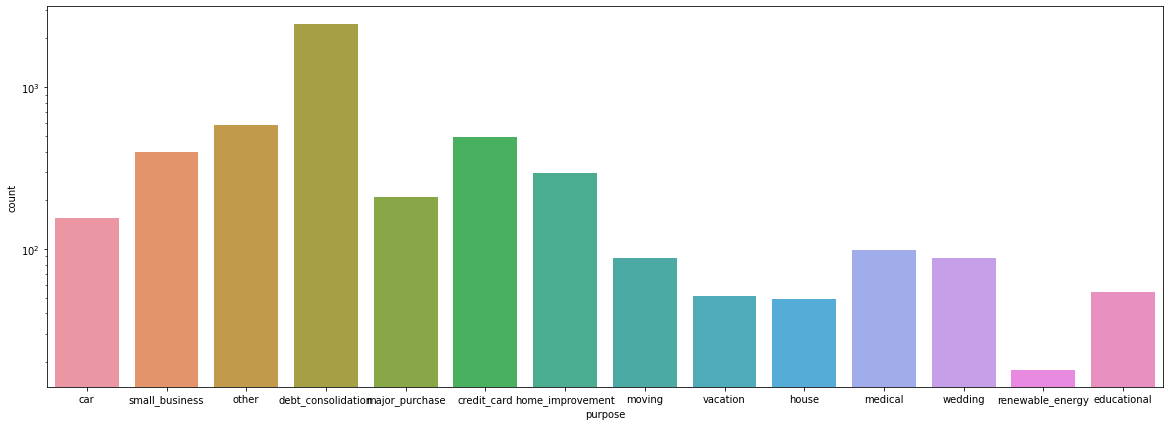

In [229]:
figure, axis = plt.subplots(figsize = (20,7))
axis.set(yscale="log") # log scales generally compress and show a better picture of data variations.
sns.countplot(x='purpose', data=df_charged_off)

<AxesSubplot:xlabel='term', ylabel='count'>

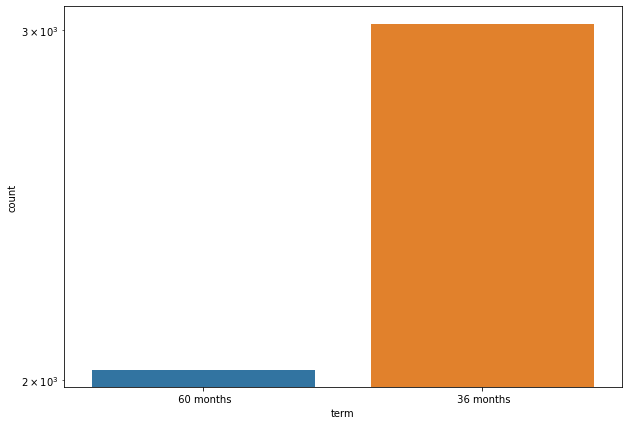

In [231]:
# terms
figure, axis = plt.subplots(figsize = (10,7))
axis.set(yscale="log") # log scales generally compress and show a better picture of data variations.
sns.countplot(x='term', data=df_charged_off)

<AxesSubplot:xlabel='grade', ylabel='count'>

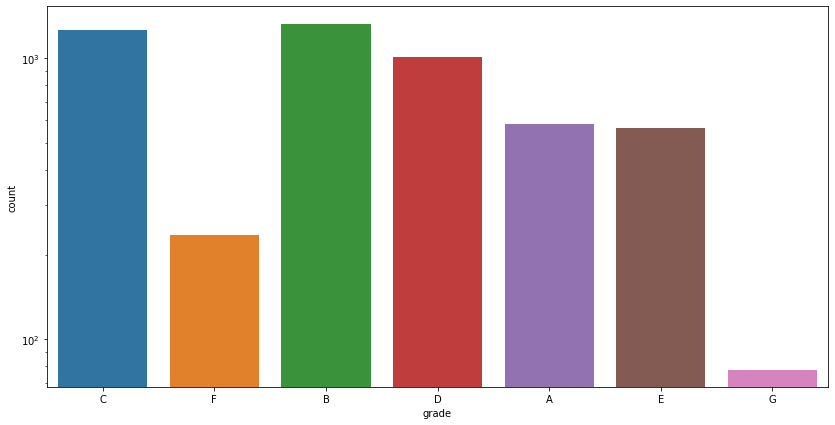

In [232]:
figure, axis = plt.subplots(figsize = (14,7))
axis.set(yscale="log") # log scales generally compress and show a better picture of data variations.
sns.countplot(x='grade', data=df_charged_off)

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

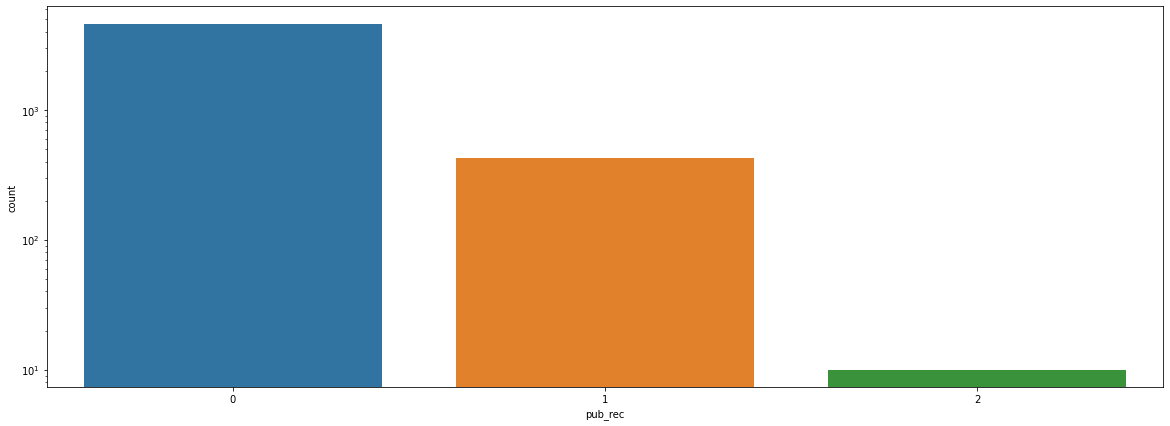

In [235]:
# Public records
figure, axis = plt.subplots(figsize = (20,7))
axis.set(yscale="log") # log scales generally compress and show a better picture of data variations.
sns.countplot(x='pub_rec', data=df_charged_off)

In [ ]:
# Let's create some bins around numeric data and see the categorical information from the data.
